In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
!pip install prophet

import prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Tratamiento de los datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Diploma/datos_def1.csv")
df
#plt.hist(df.Precipitacion)

,fecha,nombreestacion,latitud,longitud,Temperatura,Presion,Humedad,VeloViento,DireViento,Precipitacion
0,2017-01-01 01:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,10.4,754.1,89.0,1.8,46.0,0.0
1,2017-01-01 02:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,11.9,753.5,83.0,2.8,80.0,0.0
2,2017-01-01 03:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,10.8,753.0,86.0,3.1,35.0,0.0
3,2017-01-01 04:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,11.3,753.0,81.0,2.3,58.0,0.0
4,2017-01-01 05:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,9.8,753.3,88.0,1.7,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...
342381,2021-12-31 19:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,15.0,751.4,100.0,1.5,242.0,0.0
342382,2021-12-31 20:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,14.1,752.2,100.0,1.5,336.0,0.0
342383,2021-12-31 21:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,14.0,752.9,100.0,1.7,306.0,0.0
342384,2021-12-31 22:00:00,APTO EL DORADO - TX GPRS,4.706,-74.151,13.7,753.0,100.0,1.6,322.0,0.0


In [ ]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [ ]:
frec = 'D'

df_f1 = df.groupby(pd.Grouper(key='fecha', freq=frec)).mean()
#df_f

T_serie2 = df.groupby(pd.Grouper(key='fecha', freq=frec)).sum()
#T_serie2

df_f1['Precipitacion'] = T_serie2['Precipitacion']

df_f1["fecha"]=df_f1.index

In [ ]:
df_f1.head()

,latitud,longitud,Temperatura,Presion,Humedad,VeloViento,DireViento,Precipitacion,fecha
fecha,,,,,,,,,
2017-01-01,4.706,-74.151,14.852174,753.482609,70.782609,3.473913,76.304348,0.0,2017-01-01
2017-01-02,4.706,-74.151,15.312500,753.216667,62.583333,3.241667,90.791667,0.0,2017-01-02
2017-01-03,4.706,-74.151,14.229167,752.075000,71.625000,2.383333,139.916667,0.0,2017-01-03
2017-01-04,4.706,-74.151,14.795833,751.762500,74.625000,1.987500,209.125000,0.0,2017-01-04
2017-01-05,4.706,-74.151,13.541667,752.300000,82.666667,2.020833,134.208333,0.0,2017-01-05


In [ ]:
df_f1.isna().sum()

latitud          188
longitud         188
Temperatura      188
Presion          188
Humedad          188
VeloViento       188
DireViento       188
Precipitacion      0
fecha              0
dtype: int64

# Outliers

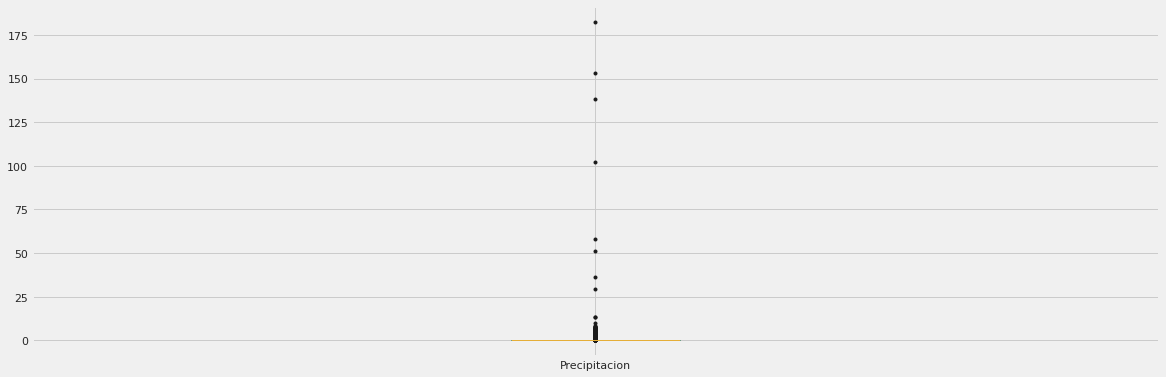

In [ ]:
df_f1.boxplot(column="Precipitacion",sym = 'k.', figsize=(18,6))

In [ ]:
'''
import plotly.graph_objs as go

precipitacion_plt = go.Scattergl(x=df_f1.index, y=df_f1['Precipitacion'], mode = 'markers', name='Observado')
df_plt = [precipitacion_plt]
layout = go.Layout(xaxis_title="Date", yaxis_title='Precipitacion')
fig = go.Figure(data=df_plt, layout=layout)
fig
'''

'\nimport plotly.graph_objs as go\n\nprecipitacion_plt = go.Scattergl(x=df_f1.index, y=df_f1[\'Precipitacion\'], mode = \'markers\', name=\'Observado\')\ndf_plt = [precipitacion_plt]\nlayout = go.Layout(xaxis_title="Date", yaxis_title=\'Precipitacion\')\nfig = go.Figure(data=df_plt, layout=layout)\nfig\n'

In [ ]:
df_f1

,latitud,longitud,Temperatura,Presion,Humedad,VeloViento,DireViento,Precipitacion,fecha
fecha,,,,,,,,,
2017-01-01,4.706,-74.151,14.852174,753.482609,70.782609,3.473913,76.304348,0.00,2017-01-01
2017-01-02,4.706,-74.151,15.312500,753.216667,62.583333,3.241667,90.791667,0.00,2017-01-02
2017-01-03,4.706,-74.151,14.229167,752.075000,71.625000,2.383333,139.916667,0.00,2017-01-03
2017-01-04,4.706,-74.151,14.795833,751.762500,74.625000,1.987500,209.125000,0.00,2017-01-04
2017-01-05,4.706,-74.151,13.541667,752.300000,82.666667,2.020833,134.208333,0.00,2017-01-05
...,...,...,...,...,...,...,...,...,...
2021-12-27,4.706,-74.151,14.386957,752.539130,97.086957,2.113043,127.304348,3.69,2021-12-27
2021-12-28,4.706,-74.151,14.588235,752.029412,98.294118,2.041176,241.000000,0.96,2021-12-28
2021-12-29,4.706,-74.151,14.671429,752.833333,95.904762,1.847619,197.619048,0.00,2021-12-29


In [ ]:
#cipitacion

Q1 = df_f1["Precipitacion"].quantile(0.25)

Q3 = df_f1["Precipitacion"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Precipitacion)):
  if df_f1.Precipitacion.iloc[i] <= B1 or df_f1.Precipitacion.iloc[i] >= 25:
    df_f1.Precipitacion.iloc[i] = np.nan



##Temperatura

Q1 = df_f1["Temperatura"].quantile(0.25)
Q3 = df_f1["Temperatura"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Temperatura)):
  if df_f1.Temperatura.iloc[i] <= B1 or df_f1.Temperatura.iloc[i] >= B2:
    df_f1.Temperatura.iloc[i] = np.nan

##Presion

Q1 = df_f1["Presion"].quantile(0.25)
Q3 = df_f1["Presion"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Presion)):
  if df_f1.Presion.iloc[i] <= B1 or df_f1.Presion.iloc[i] >= B2:
    df_f1.Presion.iloc[i] = np.nan

##Humedad

Q1 = df_f1["Humedad"].quantile(0.25)
Q3 = df_f1["Humedad"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Presion)):
  if df_f1.Humedad.iloc[i] <= B1 or df_f1.Humedad.iloc[i] >= B2:
    df_f1.Humedad.iloc[i] = np.nan

##Veloviento

Q1 = df_f1["VeloViento"].quantile(0.25)
Q3 = df_f1["VeloViento"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Presion)):
  if df_f1.VeloViento.iloc[i] <= B1 or df_f1.VeloViento.iloc[i] >= B2:
    df_f1.VeloViento.iloc[i] = np.nan

##Direviento

Q1 = df_f1["DireViento"].quantile(0.25)
Q3 = df_f1["DireViento"].quantile(0.75)

IQR = Q3 - Q1

B1 = Q1 - 1.5*IQR
B2 = Q3 + 1.5*IQR

for i in range(len(df_f1.Presion)):
  if df_f1.DireViento.iloc[i] <= B1 or df_f1.DireViento.iloc[i] >= B2:
    df_f1.DireViento.iloc[i] = np.nan

df_f2 = df_f1.copy()

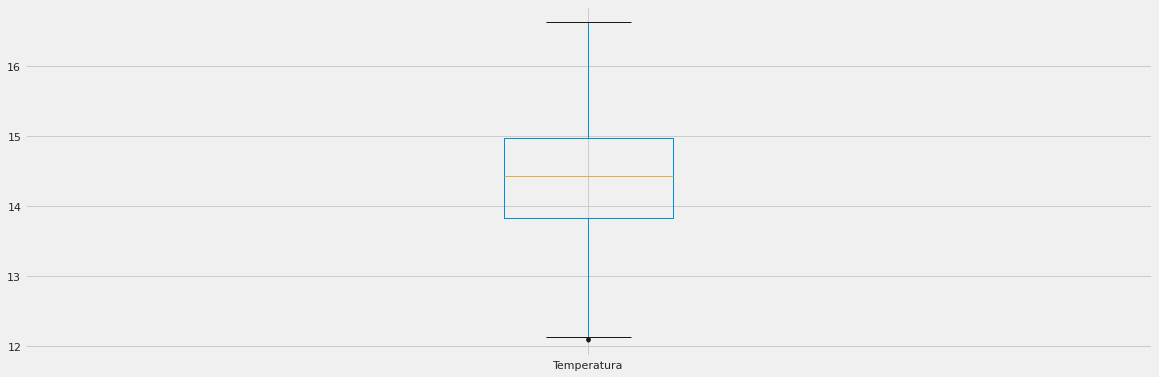

In [ ]:
df_f1.boxplot(column="Temperatura",sym = 'k.', figsize=(18,6))

In [ ]:
df_f2.isna().sum()

latitud          188
longitud         188
Temperatura      221
Presion          234
Humedad          191
VeloViento       214
DireViento       188
Precipitacion      8
fecha              0
dtype: int64

In [ ]:
#df_f1.drop(index=df_f1.iloc[71:88].index.tolist(), inplace=True)

# Valores Faltantes e Interpolación

En este punto haremos uso de una API de python llamada prophet, más información de este: https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
#USING PROPHET TO PREDICT BEHAVIOR
#df_ph = df_f1[['Tiempo Sistema',df_f1["fecha"]]]

In [ ]:
forecast_horizon = 10 #days to forcast

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'Temperatura': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
#fcstT = fcst
fcst1= fcst[['ds', 'yhat']]

fcst1 = fcst1.rename(columns={'ds':'fecha', 'yhat':'Temperatura'})
fcst1['fecha'] = pd.to_datetime(fcst1['fecha'])
df_f = fcst1.groupby(pd.Grouper(key='fecha')).mean()

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'Presion': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
#fcstP = fcst
fcst1= fcst[['ds', 'yhat']]

df_f['Presion'] = np.array(fcst1['yhat'])

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'Humedad': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
#fcstH = fcst
fcst1= fcst[['ds', 'yhat']]

df_f['Humedad'] = np.array(fcst1['yhat'])

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'VeloViento': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
#fcstVel = fcst
fcst1= fcst[['ds', 'yhat']]

df_f['VeloViento'] = np.array(fcst1['yhat'])

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'DireViento': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
#fcstDir = fcst
fcst1= fcst[['ds', 'yhat']]

df_f['DireViento'] = np.array(fcst1['yhat'])

df_ph = df_f1
df_ph = df_ph.rename(columns={'fecha': 'ds', 'Precipitacion': 'y'})
df_ph['ds'] = pd.to_datetime(df_ph['ds'])
m = Prophet(changepoint_prior_scale=0.01).fit(df_ph)
future = m.make_future_dataframe(periods=forecast_horizon, freq=frec)
fcst = m.predict(future)
fcst1= fcst[['ds', 'yhat']]

df_f['Precipitacion'] = np.array(fcst1['yhat'])

df_f3 = df_f.copy()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40e8horw/lrpur_dy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40e8horw/lgl6908l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42652', 'data', 'file=/tmp/tmp40e8horw/lrpur_dy.json', 'init=/tmp/tmp40e8horw/lgl6908l.json', 'output', 'file=/tmp/tmp40e8horw/prophet_modelu5_ye7e7/prophet_model-20221122162517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40e

In [ ]:
df_f

,Temperatura,Presion,Humedad,VeloViento,DireViento,Precipitacion
fecha,,,,,,
2017-01-01,14.495698,752.951791,72.576347,2.321418,177.361323,0.133272
2017-01-02,14.380249,752.957586,72.735229,2.333061,171.784169,0.183437
2017-01-03,14.432385,752.957910,72.540337,2.331003,177.960612,0.034064
2017-01-04,14.322804,752.991086,72.902152,2.301820,185.602267,0.094436
2017-01-05,14.328513,753.001999,72.954597,2.306305,180.333957,0.052790
...,...,...,...,...,...,...
2022-01-06,13.730780,752.344473,94.985617,2.204385,195.766935,0.230446
2022-01-07,13.807574,752.402600,95.307088,2.257327,191.495874,0.274071
2022-01-08,13.681855,752.447424,95.682068,2.202330,193.226919,0.333741


In [ ]:
#for i in range(len(df_f1.Presion)):
#  if df_f1.Presion.iloc[i] != float:
#    df_f1.Presion.iloc[i] = 750#df_f1.Presion.iloc[i]

###Rellenamos los valores nulos en el dataset con los predichos por prophet

In [ ]:
df_f1.Presion.fillna(df_f.Presion,inplace=True)
df_f1.Temperatura.fillna(df_f.Temperatura,inplace=True)
df_f1.Precipitacion.fillna(df_f.Precipitacion,inplace=True)
df_f1.Humedad.fillna(df_f.Humedad,inplace=True)
df_f1.VeloViento.fillna(df_f.VeloViento,inplace=True)
df_f1.DireViento.fillna(df_f.DireViento,inplace=True)

df_f = df_f1

In [ ]:
df_f.isna().sum()

latitud          188
longitud         188
Temperatura        0
Presion            0
Humedad            0
VeloViento         0
DireViento         0
Precipitacion      0
fecha              0
dtype: int64

##Presión ajustada

Text(0.5, 1.0, 'Ajuste de la Presion')

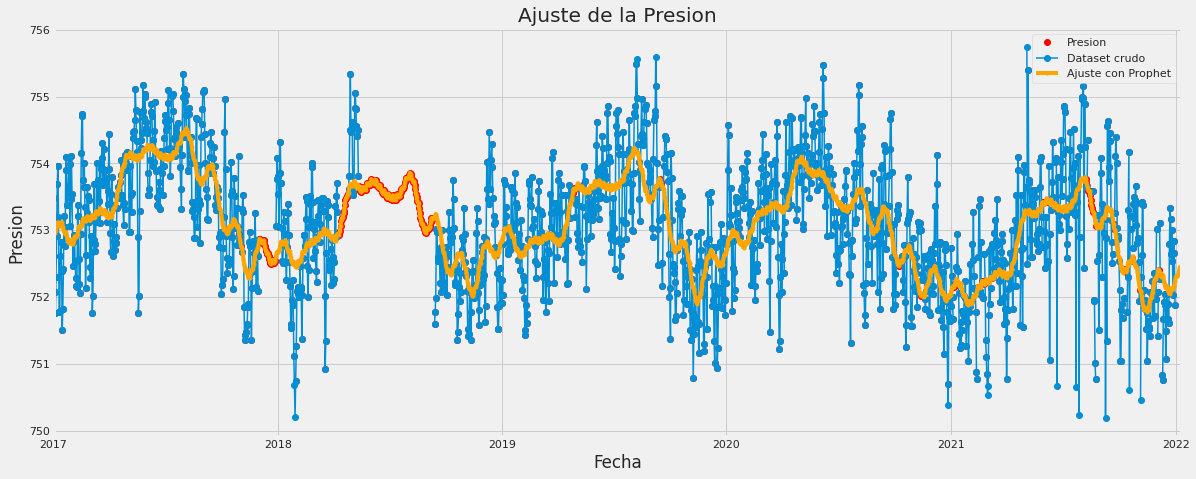

In [ ]:
plt.figure(figsize=(18,7)) 
df_f['Presion'].plot(color='red', marker='o', linestyle='dotted',lw=0)
df_f2['Presion'].plot(title='MaxSpeed', marker='o', label="Dataset crudo",lw=1.5)
df_f3['Presion'].plot(color='orange', marker='o', ms=3, label = "Ajuste con Prophet")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Presion")
plt.title("Ajuste de la Presion")

##Temperatura ajustada

Text(0.5, 1.0, 'Ajuste de la Temperatura')

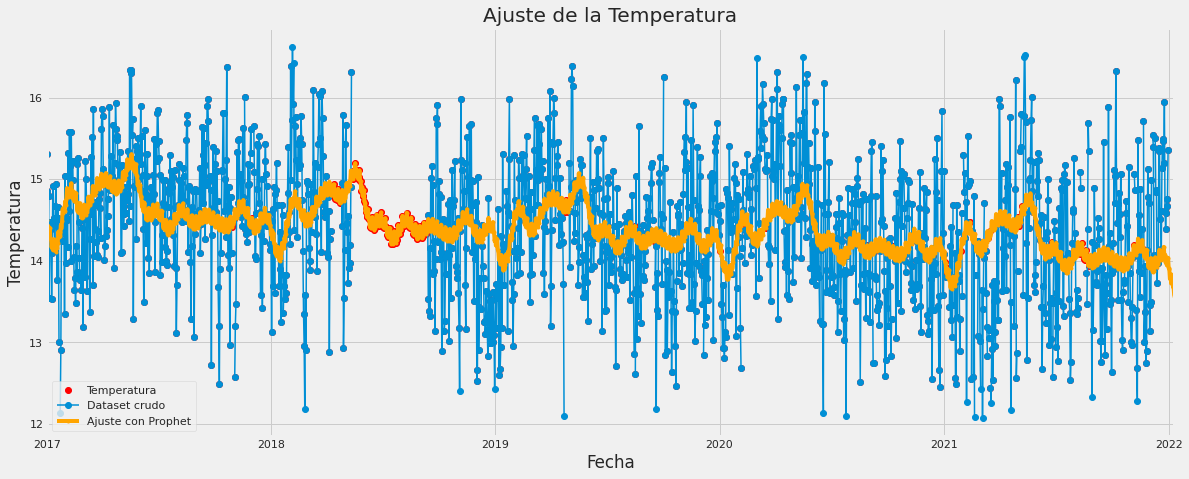

In [ ]:
plt.figure(figsize=(18,7)) 
df_f['Temperatura'].plot(color='red', marker='o', linestyle='dotted',lw=0)
df_f2['Temperatura'].plot(title='MaxSpeed', marker='o', label="Dataset crudo",lw=1.5)
df_f3['Temperatura'].plot(color='orange', marker='o', ms=3, label = "Ajuste con Prophet")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Temperatura")
plt.title("Ajuste de la Temperatura")

##Velocidad del viento ajustada

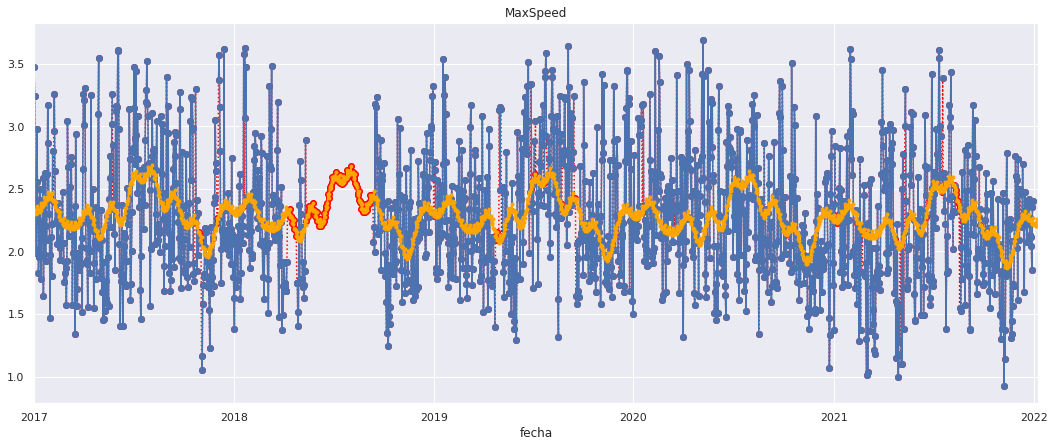

In [ ]:
plt.figure(figsize=(18,7)) 
df_f['VeloViento'].plot(color='red', marker='o', linestyle='dotted')
df_f2['VeloViento'].plot(title='MaxSpeed', marker='o')
df_f3['VeloViento'].plot(color='orange', marker='o', ms=3)

##Precipitación ajustada

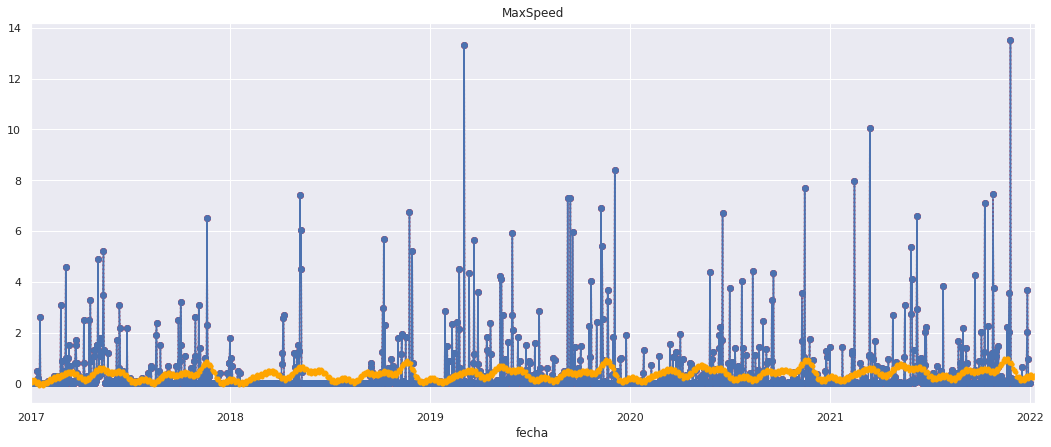

In [ ]:
# Imputing with linear interpolation
#df_f = df_f1.interpolate(method='linear')

# Plot imputed data
plt.figure(figsize=(18,7)) 
df_f['Precipitacion'].plot(color='red', marker='o', linestyle='dotted')
df_f1['Precipitacion'].plot(title='MaxSpeed', marker='o')
df_f3['Precipitacion'].plot(color='orange', marker='o',ms=3)

# Regresión lineal

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model = make_pipeline(StandardScaler(),LinearRegression())
LR = LinearRegression()

X = df_f[['Temperatura', 'Presion','Humedad',	'VeloViento',	'DireViento']]
y = df_f["Precipitacion"]

X.shape

(1826, 5)

In [ ]:
a = int(0.8*len(y))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = df_f3[['Temperatura', 'Presion','Humedad',	'VeloViento',	'DireViento']].iloc[:a]
y_train = df_f3["Precipitacion"].iloc[:a]
X_test  = df_f3[['Temperatura', 'Presion','Humedad',	'VeloViento',	'DireViento']].iloc[a:]
y_test  = df_f3["Precipitacion"].iloc[a:]

df_predicho = df_f3.copy()

scale = StandardScaler()
minmax = MinMaxScaler()

#X_train = scale.fit_transform(X_train) 
#X_test  = scale.fit_transform(X_test)
##
#X_train = minmax.fit_transform(X_train)
#X_test  = minmax.fit_transform(X_test)


model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6344090417340513

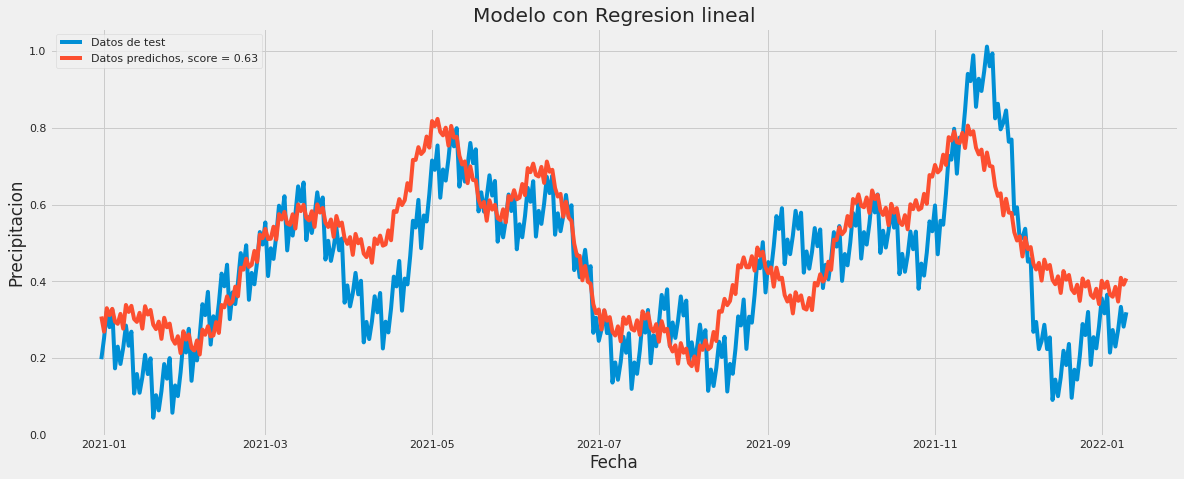

In [ ]:
y_predict = model.predict(X_test)
df_predicho["Precipitacion"].iloc[a:] = y_predict

plt.figure(figsize=(18,7)) 
plt.plot(y_test, label="Datos de test")
plt.plot(df_predicho["Precipitacion"].iloc[a:], label=f"Datos predichos, score = {np.round(model.score(X_test,y_test),2)}")
plt.xlabel("Fecha")
plt.ylabel("Precipitacion")
plt.title("Modelo con Regresion lineal")
plt.legend()

Text(0, 0.5, 'Scores')

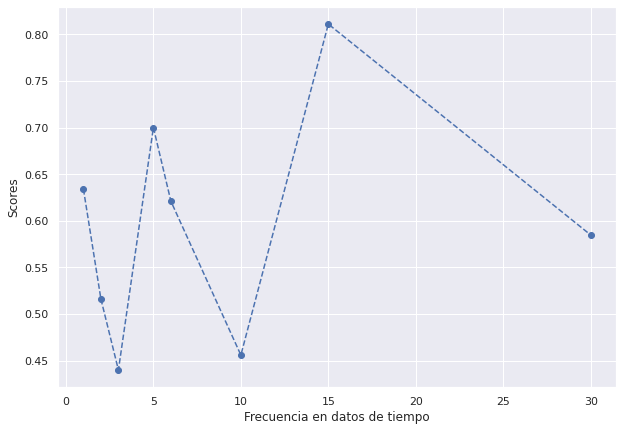

In [ ]:
t = np.array([1,2,3,5,6,10,15,30])
score = np.array([0.634,0.516,0.44,0.7,0.621,0.456,0.811,0.5848])
plt.figure(figsize=(10,7)) 
plt.plot(t,score,"o--")
plt.xlabel("Frecuencia en datos de tiempo")
plt.ylabel("Scores")

# Random forest regression

##GridSearch para obtener los mejores parámetros

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

#X = df_f[['Temperatura', 'Presion','Humedad',	'VeloViento',	'DireViento']]
#X = df_f.drop(['Precipitacion',"latitud",	"longitud"],axis=1)
#y = df_f["Precipitacion"]

rfr = RandomForestRegressor()#n_estimators=240, max_depth = 4)
#results = cross_validate(forest,X,y,cv=5,scoring='r2')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,50, 100,300, 500,700], 'max_depth' : [4,5,6,7,8]}
param_test1 = {'n_estimators':range(10,1000,50), 'max_depth' : range(2,9,1)}
#param_test1 = {'n_estimators':240, 'max_depth' : 4}

#CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)

In [ ]:
gsearch2 = GridSearchCV(estimator=rfr, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5)

In [ ]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 9),
                         'n_estimators': range(10, 1000, 50)},
             scoring='r2')

In [ ]:
gsearch2.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=610)

##Resultados finales

In [ ]:
final_results = cross_validate(gsearch2.best_estimator_,X_train,y_train,return_train_score=True)

test_scores = final_results['test_score']
train_scores = final_results['train_score']
print("El train score es:",np.mean(train_scores))
print("El test score es:",np.mean(test_scores))

El train score es: 0.8748701348547299
El test score es: 0.5039276944799813


In [ ]:
rfr = RandomForestRegressor(n_estimators=610, max_depth = 8)

rfr.fit(X_train,y_train)

#final_results = cross_validate(gsearch2.best_estimator_,X_train,y_train,return_train_score=True)
final_results = cross_validate(rfr,X_train,y_train,return_train_score=True)

test_scores = final_results['test_score']
train_scores = final_results['train_score']
print("El train score es:",np.mean(train_scores))
print("El test score es:",np.mean(test_scores))

El train score es: 0.9309954940747002
El test score es: 0.7460237157635093


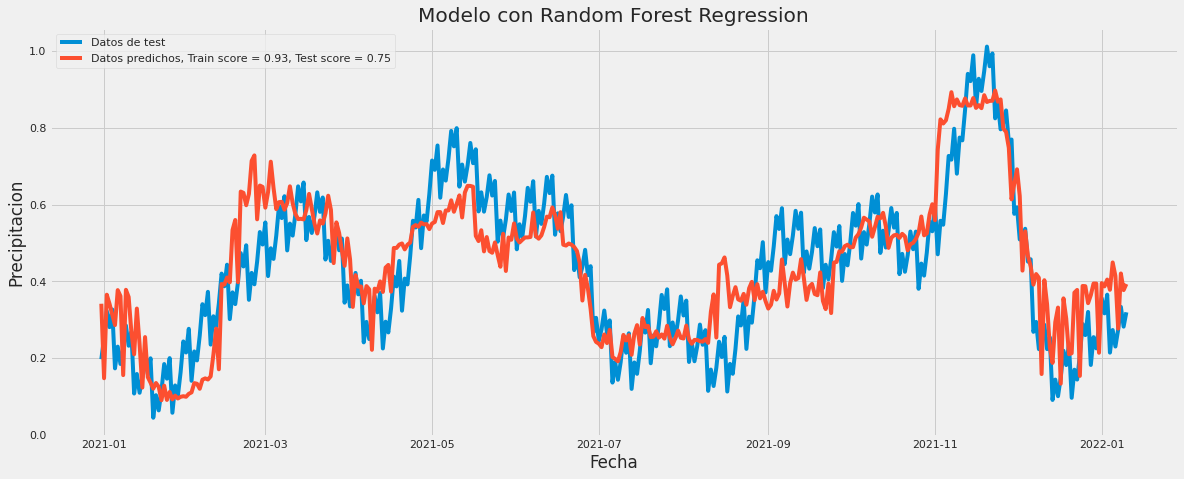

In [ ]:
y_predict = rfr.predict(X_test)
df_predicho["Precipitacion"].iloc[a:] = y_predict

plt.figure(figsize=(18,7)) 
plt.plot(y_test, label="Datos de test")
plt.plot(df_predicho["Precipitacion"].iloc[a:], label=f"Datos predichos, Train score = {np.round(np.mean(train_scores),2)}, Test score = {np.round(np.mean(test_scores),2)}")
plt.xlabel("Fecha")
plt.ylabel("Precipitacion")
plt.title("Modelo con Random Forest Regression")
plt.legend()


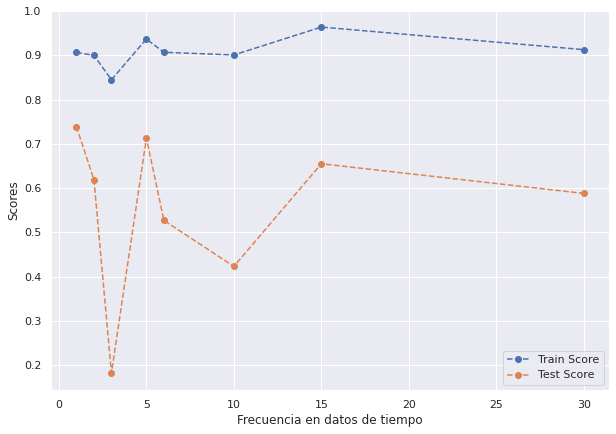

In [ ]:
t = np.array([1,2,3,5,6,10,15,30])
scoretrain = np.array([0.907,0.90,0.845,0.937,0.907,0.901,0.964,0.913])
scoretest = np.array([0.739,0.619,0.182,0.713,0.527,0.423,0.655,0.588])
plt.figure(figsize=(10,7)) 
plt.plot(t,scoretrain,"o--",label="Train Score")
plt.plot(t,scoretest,"o--",label="Test Score")
plt.xlabel("Frecuencia en datos de tiempo")
plt.ylabel("Scores")
plt.legend()

##Curvas de validación

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    ):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")

    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


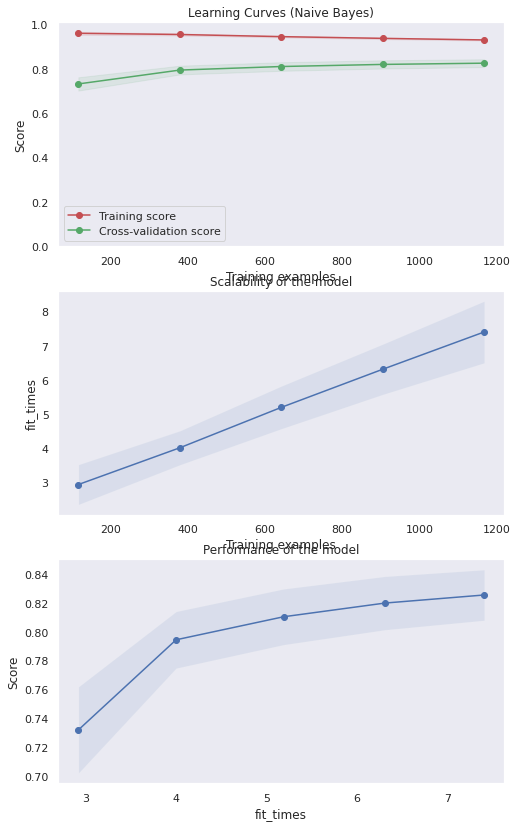

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(rfr, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.01), cv=cv, n_jobs=4)
plt.show()

##Importancia de las características

In [ ]:
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: VeloViento           Importance: 0.66
Variable: DireViento           Importance: 0.14
Variable: Presion              Importance: 0.1
Variable: Humedad              Importance: 0.06
Variable: Temperatura          Importance: 0.04


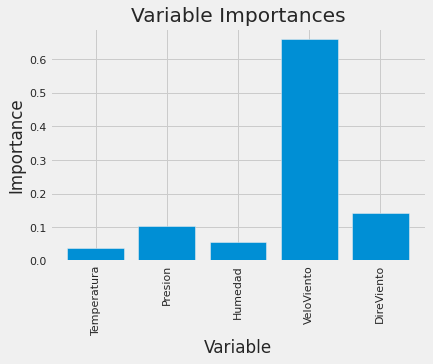

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

#ensemble = GradientBoostingRegressor()
#results = cross_validate(ensemble,X_train,y_train,cv=5,scoring='r2')

##Gridsearch para encontrar los mejores parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,1001,20)}
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)
gsearch1 = GridSearchCV(estimator, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5)

In [ ]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 1001, 20)}, scoring='r2')

In [ ]:
#list(zip(gsearch1.cv_results_['mean_test_score'],gsearch1.cv_results_['std_test_score'],gsearch1.cv_results_['params']))

In [ ]:
cross_validate(gsearch1.best_estimator_,X_train,y_train)

{'fit_time': array([0.16968369, 0.15924811, 0.15125751, 0.16956949, 0.16167736]),
 'score_time': array([0.00131989, 0.00122523, 0.00126028, 0.00126338, 0.00120521]),
 'test_score': array([0.68291871, 0.80917177, 0.76231889, 0.73865981, 0.6393281 ])}

In [ ]:
gsearch1.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=160,
                          random_state=10, subsample=0.8)

##Resultados finales

In [ ]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train,return_train_score=True)

test_scores = final_results['test_score']
train_scores = final_results['train_score']
print("El train score es:",np.mean(train_scores))
print("El test score es:",np.mean(test_scores))

El train score es: 0.8446169510347884
El test score es: 0.7264794554331694


In [ ]:
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       n_estimators=160,
                                       random_state=10)

estimator.fit(X_train,y_train)

#final_results = cross_validate(gsearch2.best_estimator_,X_train,y_train,return_train_score=True)
final_results = cross_validate(rfr,X_train,y_train,return_train_score=True)

test_scores = final_results['test_score']
train_scores = final_results['train_score']
print("El train score es:",np.mean(train_scores))
print("El test score es:",np.mean(test_scores))

El train score es: 0.9308273816635652
El test score es: 0.7435570527156349


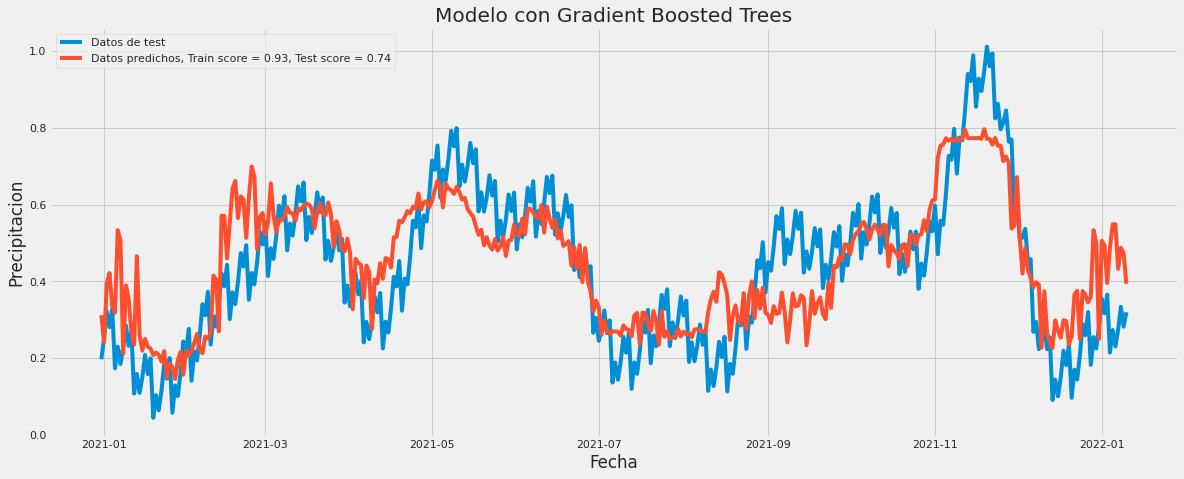

In [ ]:
y_predict = estimator.predict(X_test)
df_predicho["Precipitacion"].iloc[a:] = y_predict

plt.figure(figsize=(18,7)) 
plt.plot(y_test, label="Datos de test")
plt.plot(df_predicho["Precipitacion"].iloc[a:], label=f"Datos predichos, Train score = {np.round(np.mean(train_scores),2)}, Test score = {np.round(np.mean(test_scores),2)}")
plt.xlabel("Fecha")
plt.ylabel("Precipitacion")
plt.title("Modelo con Gradient Boosted Trees")
plt.legend()

##Importancia de las características

In [ ]:
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(estimator.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: VeloViento           Importance: 0.52
Variable: DireViento           Importance: 0.21
Variable: Humedad              Importance: 0.13
Variable: Presion              Importance: 0.1
Variable: Temperatura          Importance: 0.03


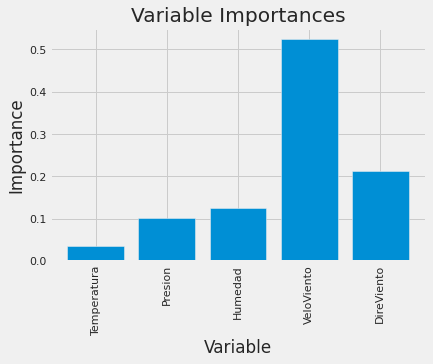

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');